# A notebook to run the whole pipeline with NetworkX backend

Created: 2020-08-14

Update: 2023-08-10

### Undirected using NetworkX

In [1]:
import sys
sys.path.append('..')

In [2]:
from traffic_flow import MTMnxUndirected
from traffic_flow.sample_networks import load_network_2_undirected

In [3]:
df_nodes, df_link_types, df_links = load_network_2_undirected()

In [4]:
df_nodes.head(2)

,id,is_zone,code,name,coords,pop,n_employed,n_workplaces,n_students_uni,n_students_standard
0,1,False,NaN,NaN,"(1914068.2805,6131920.7668)",NaN,NaN,NaN,NaN,NaN
1,2,False,NaN,NaN,"(1960345.9816,6156425.4523)",NaN,NaN,NaN,NaN,NaN


In [5]:
df_link_types.head(2)

,type,type_name,qmax,v0,a,b
0,1,D_6,70000,110,0.15,4
1,2,D_4,50000,125,0.15,4


In [6]:
df_links.head(2)

,id,node_from,node_to,type,length,name,count
0,1,1,2,1,36.000,BA-TT D1,45085.0
1,2,2,3,2,36.006,TT-NR R1,25135.0


In [7]:
# MTM object
model = MTMnxUndirected()
model.read_data(df_nodes, df_link_types, df_links)
model.compute_skims()
model.generate("ALL", "pop", "pop", 0.3)
model.distribute("ALL", "t0", "exp", -0.02)
model.assign("tcur")

In [8]:
model.df_links.head()

id  type  length              name    count type_name  \
node_from node_to                                                          
1         2         1     1  36.000          BA-TT D1  45085.0       D_6   
2         3         2     2  36.006          TT-NR R1  25135.0       D_4   
          4         3     2  75.005          TT-TN D1  19088.0       D_4   
4         5         4     2  71.690          TN-ZA D1  17280.0       D_4   
5         6         5     5  24.330  ZA-MT I/18, I/65  20196.0  I_2 slow   

                    qmax   v0     a  b         t0             q        tcur  \
node_from node_to                                                             
1         2        70000  110  0.15  4  19.636364  91674.023936   28.300900   
2         3        50000  125  0.15  4  17.282880  68541.749241   26.437664   
          4        50000  125  0.15  4  36.002400  53550.530451   43.107952   
4         5        50000  125  0.15  4  34.411200  43080.246798   37.255817   
5         6        15000   65  0.15  4  22.458462  42426.754323  238.066755   

                         vcur  
node_from node_to              
1         2         76.322660  
2         3         81.715238  
          4        104.396053  
4         5        115.455796  
5         6          6.131894

<AxesSubplot:xlabel='count', ylabel='q'>

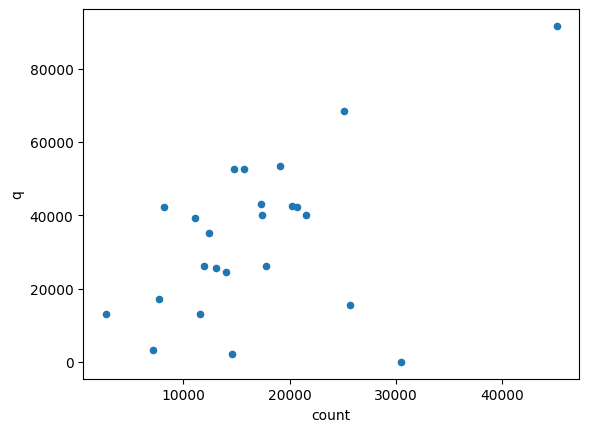

In [9]:
model.df_links.plot.scatter(x="count", y="q")

## Directed model with NetworkX

In [10]:
from traffic_flow import MTMnx
from traffic_flow.sample_networks import load_network_2

In [11]:
df_nodes, df_link_types, df_links = load_network_2()

In [12]:
df_link_types

,type,type_name,qmax,v0,a,b
0,1,D_6,35000,110,0.15,4
1,2,D_4,25000,125,0.15,4
2,3,D_4 intra,25000,90,0.15,4
3,4,I_2 fast,10000,80,0.15,4
4,5,I_2 slow,7500,65,0.15,4
5,6,I_2 intra,7500,50,0.15,4
6,0,conn,10000,40,0.15,4


In [13]:
model = MTMnx()
model.read_data(df_nodes, df_link_types, df_links)
model.compute_skims()
model.generate("ALL", "pop", "pop", 0.3)
model.distribute("ALL", "t0", "exp", -0.02)
model.assign("tcur")

In [14]:
model.df_links.head()

id  type  length      name    count type_name   qmax   v0  \
node_from node_to                                                              
1         2         1     1  36.000  BA-TT D1  22543.0       D_6  35000  110   
2         1         1     1  36.000  BA-TT D1  22543.0       D_6  35000  110   
          3         2     2  36.006  TT-NR R1  12568.0       D_4  25000  125   
3         2         2     2  36.006  TT-NR R1  12568.0       D_4  25000  125   
2         4         3     2  75.005  TT-TN D1   9544.0       D_4  25000  125   

                      a  b         t0             q       tcur        vcur  \
node_from node_to                                                            
1         2        0.15  4  19.636364  45559.268332  28.092795   76.888043   
2         1        0.15  4  19.636364  46114.755604  28.512823   75.755388   
          3        0.15  4  17.282880  34087.529861  26.243323   82.320369   
3         2        0.15  4  17.282880  34454.219380  26.635149   81.109364   
2         4        0.15  4  36.002400  26614.202415  42.938518  104.807994   

                         geh      var_geh  
node_from node_to                          
1         2        39.442926  1555.744385  
2         1        40.231120  1618.543040  
          3        44.554976  1985.145884  
3         2        45.137155  2037.362783  
2         4        40.146737  1611.760492

<AxesSubplot:xlabel='count', ylabel='q'>

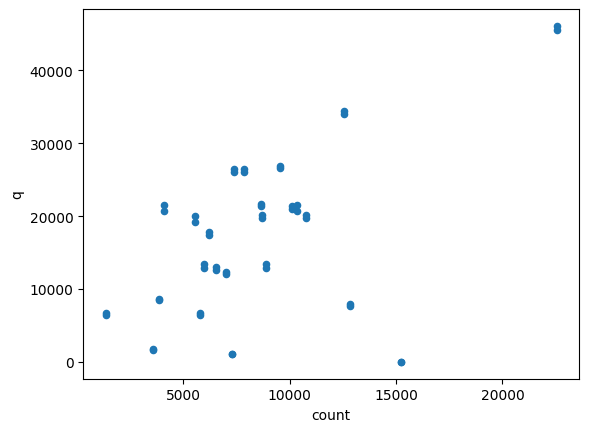

In [15]:
# compare with measurements
model.df_links.plot.scatter(x="count", y="q")